**Linear Regression using Gradient descent.**
---
Aim:  Determine the value of m and c, such that the line corresponding to those values is the best fitting line or gives the minimum error.

In [1]:
# Making the imports
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import files


uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['data.csv']))
print(data.head())

Saving data.csv to data.csv
           X          Y
0  32.502345  31.707006
1  53.426804  68.777596
2  61.530358  62.562382
3  47.475640  71.546632
4  59.813208  87.230925


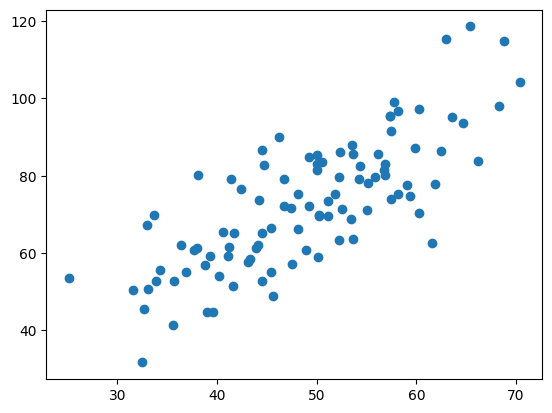

In [3]:
X = data.iloc[:, 0]
Y = data.iloc[:, 1]

plt.scatter(X, Y)
plt.show()

Loss Function
---
The loss is the error in our predicted value of m and c.
---
Goal - minimize this error to obtain the most accurate value of m and c.
---
Here we will use the MSE function to calculate the loss.
---

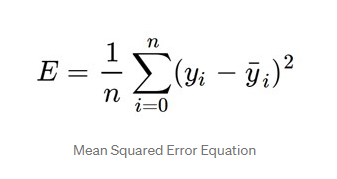



Applying gradient descent to m and c


1.   Calculate the partial derivative of the loss function w.r.t m, and plug in the current values of x, y, m and c in it to obtain the derivative value D.

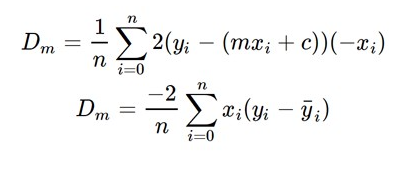



2. Similarly find the partial derivative with respect to c, Dc :

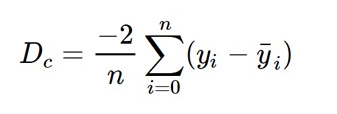

3. update the current value of m and c using the following equation:

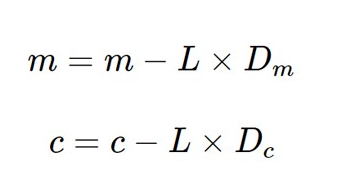



m values:  [0.87356763 0.58446883 0.8548809  0.74877673]
c values:  [0.61848862 0.27348213 0.31524189 0.44544664]
Plotting for epoch:  0


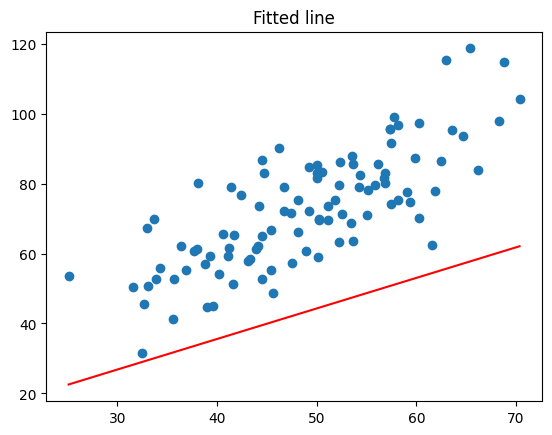

Plotting for epoch:  1


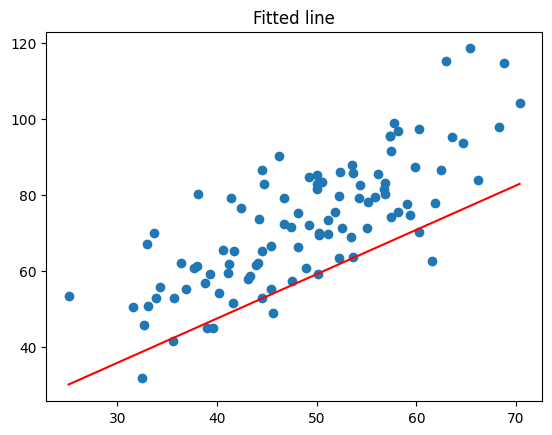

Plotting for epoch:  2


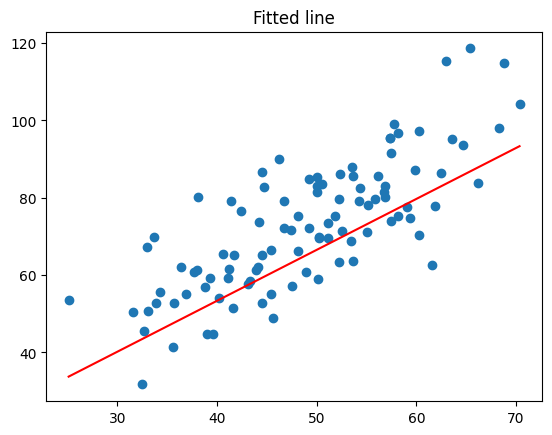

Plotting for epoch:  3


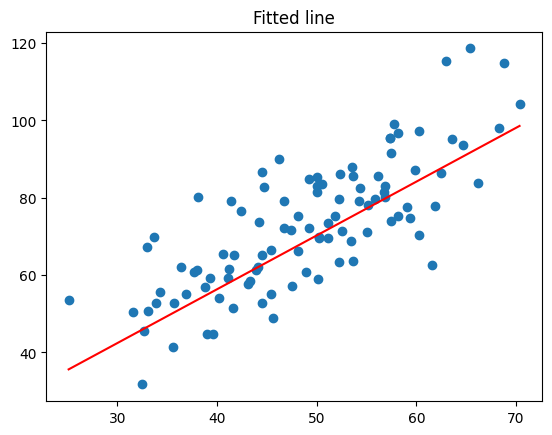

Plotting for epoch:  4


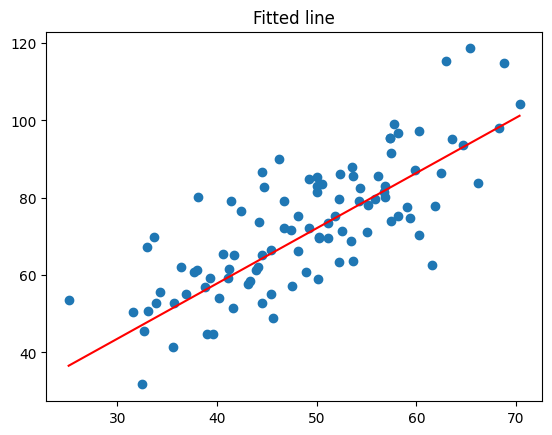

Values of m and c for iteration:  0 :  1.448251507233499 0.6300617525655406


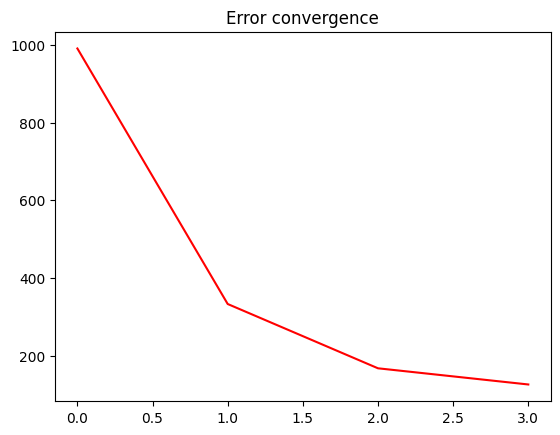

errorList [990.5181211675902, 333.27758998083567, 167.90407203316641, 126.29310845623415, 115.8230212792662]
min of error List 115.8230212792662
Plotting for epoch:  0


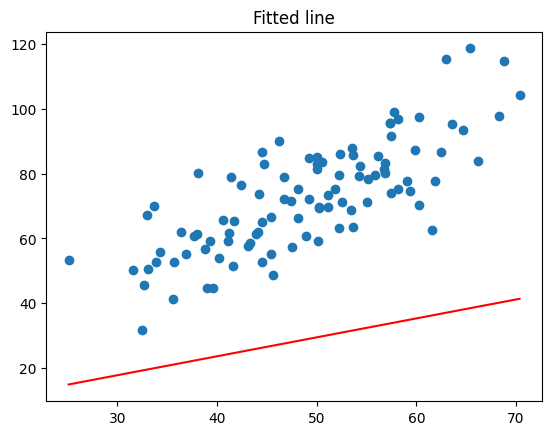

Plotting for epoch:  1


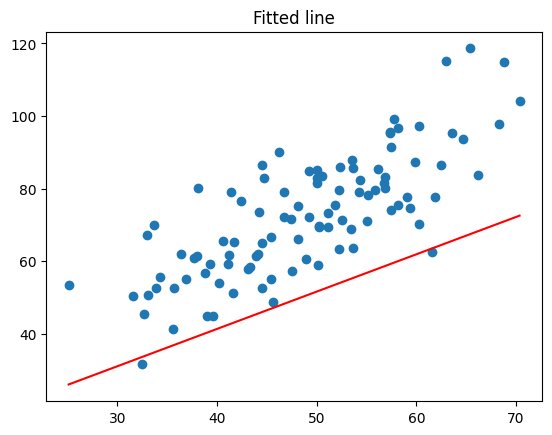

Plotting for epoch:  2


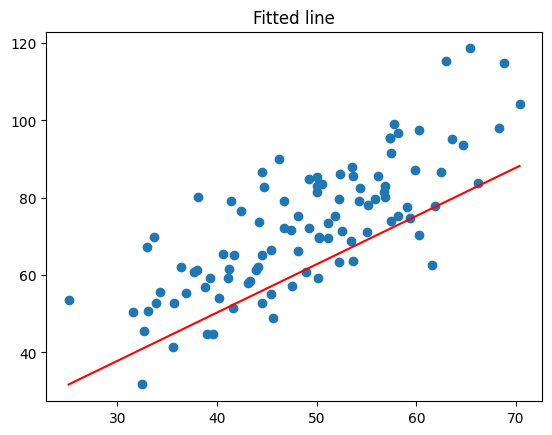

Plotting for epoch:  3


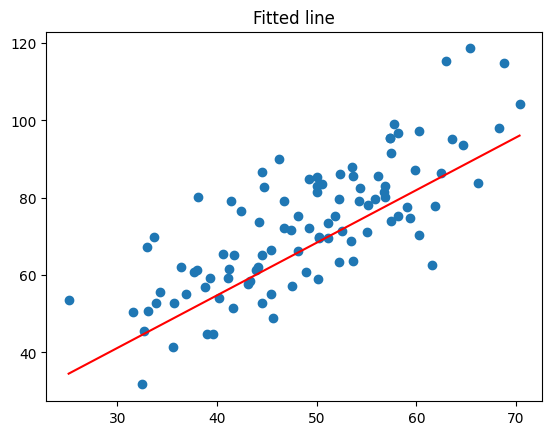

Plotting for epoch:  4


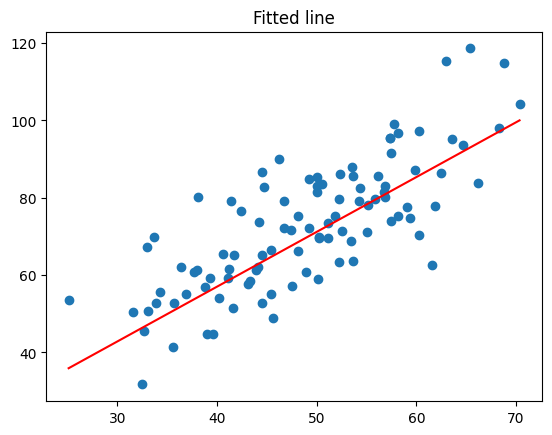

Values of m and c for iteration:  1 :  1.4455250582534198 0.29069662201892005


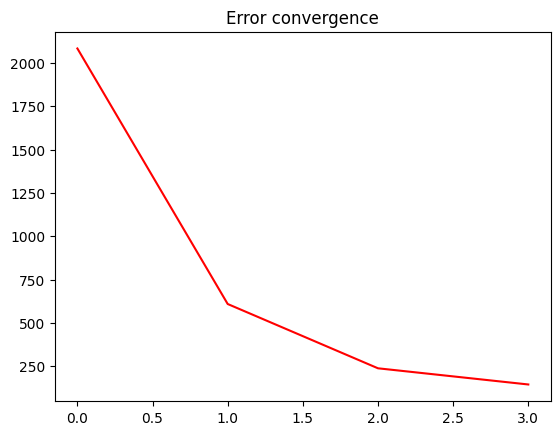

errorList [2084.026037786956, 608.5681104688327, 237.3164317144035, 143.90283153782602, 120.39827055438697]
min of error List 120.39827055438697
Plotting for epoch:  0


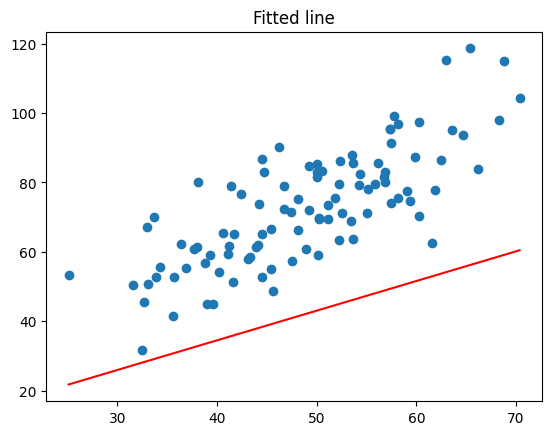

Plotting for epoch:  1


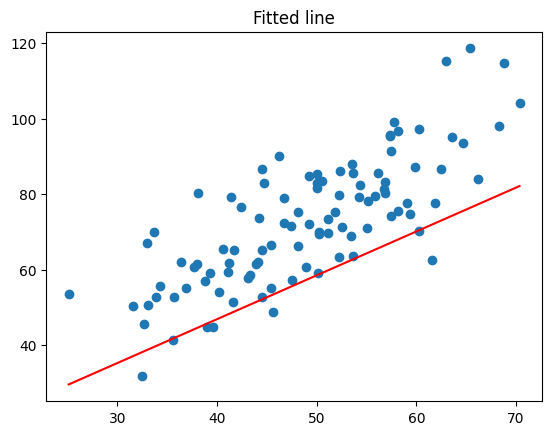

Plotting for epoch:  2


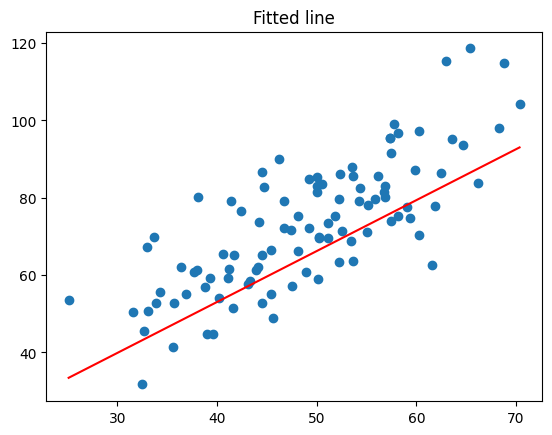

Plotting for epoch:  3


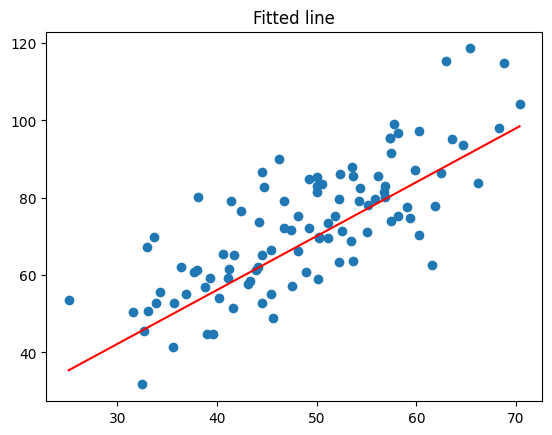

Plotting for epoch:  4


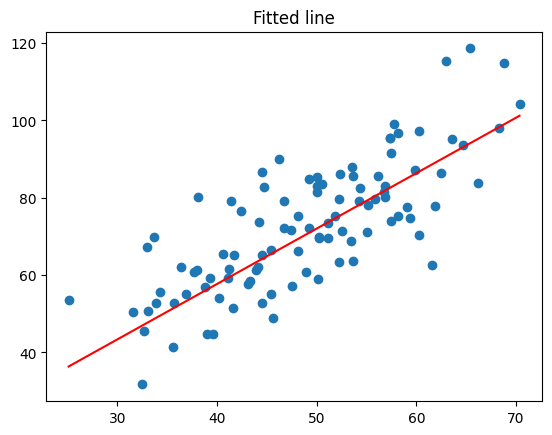

Values of m and c for iteration:  2 :  1.453419550285309 0.3272953038232648


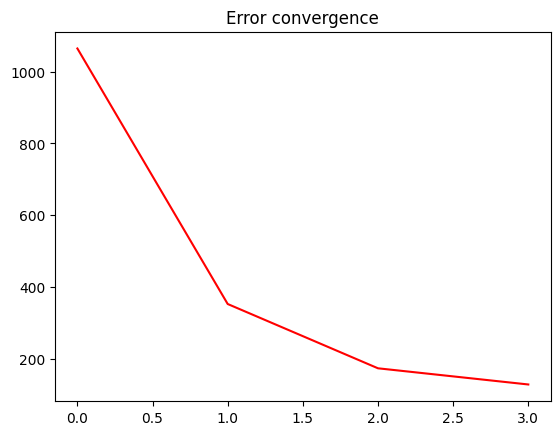

errorList [1065.1113729492856, 352.17510899406125, 172.78754472151454, 127.65039402938791, 116.29305304794727]
min of error List 116.29305304794727
Plotting for epoch:  0


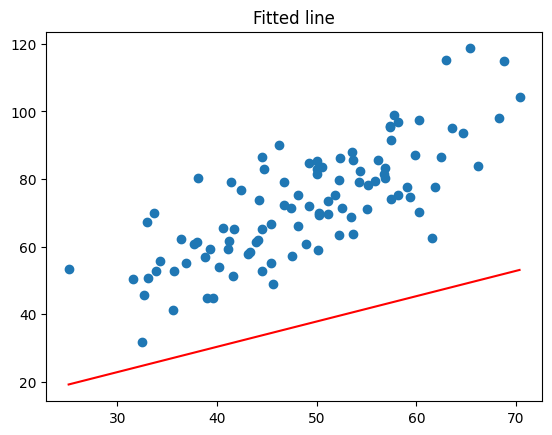

Plotting for epoch:  1


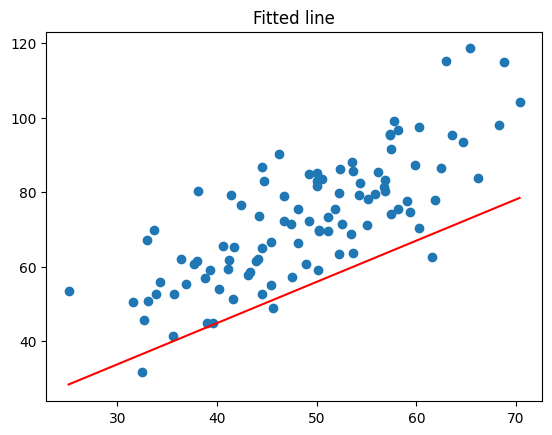

Plotting for epoch:  2


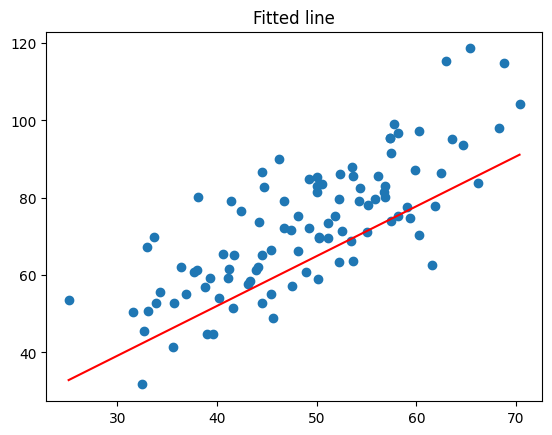

Plotting for epoch:  3


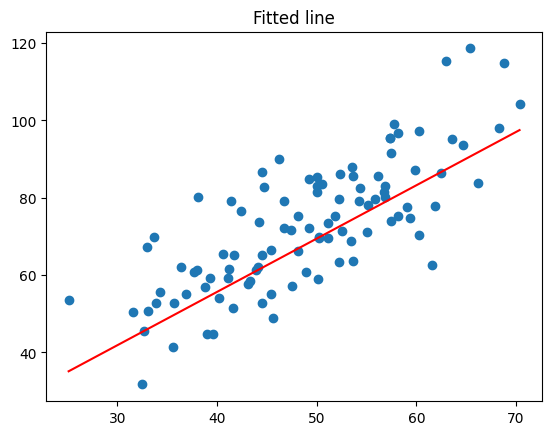

Plotting for epoch:  4


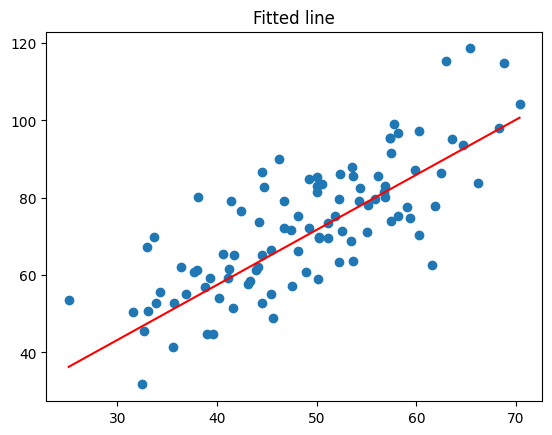

Values of m and c for iteration:  3 :  1.4475334096592418 0.45946481778408504


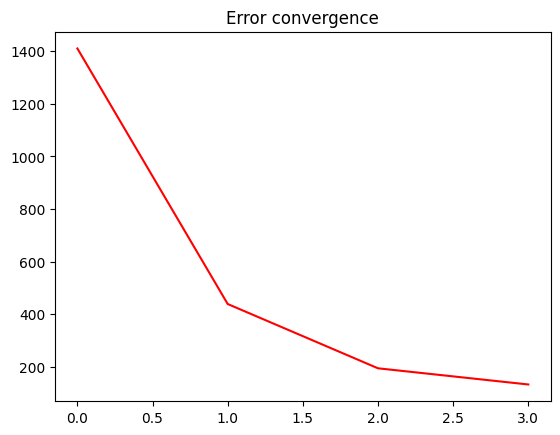

errorList [1410.754091179377, 439.0882389890457, 194.59967495889742, 133.081947030071, 117.60296014679948]
min of error List 117.60296014679948
[115.8230212792662, 120.39827055438697, 116.29305304794727, 117.60296014679948]


In [8]:
# Building the model
import scipy.stats as st

####Take random intial values############
#l=0.95                                          #Confidence Level

# taking 4 random values for m and c
m=np.random.random_sample(size = 4)
c=np.random.random_sample(size = 4)
print("m values: ",m)
print("c values: ",c)

L = 0.0001  # The learning Rate
epochs = 5  # The number of iterations to perform gradient descent
n = len(X) # Number of elements in X

intervalList=[]
errorFinalList=[]

for k in range(4):
  #print("m is ",m[k])
  #print("c is ",c[k])
  errorList=[]

  # Performing Gradient Descent
  for i in range(epochs):

    Y_pred = m[k]*X + c[k]  # The current predicted value of Y (mx+c)
    e=mean_squared_error(Y,Y_pred) # Find MSE
    errorList.append(e) # Append to list

    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m[k] = m[k] - L * D_m  # Weight upadte m
    c[k] = c[k] - L * D_c  # Weight upadte c
    print("Plotting for epoch: ",i)
    plt.figure()
    plt.scatter(X, Y) #plot data points
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') #plot line
    plt.title("Fitted line ")
    plt.show()

  print ("Values of m and c for iteration: ",k,": ",m[k], c[k])

  # Plot for error convergence
  plt.figure()
  plt.plot(errorList[0:4], color='red')
  plt.title("Error convergence")
  plt.show()

  # lo,hi=st.t.interval(l,len(errorList)-1,loc=st.tmean(errorList),scale=st.sem(errorList))
  # li=[]
  # li.append(hi)
  # li.append(lo)
  # intervalList.append(li)
  print("errorList",errorList)
  print("min of error List",min(errorList))
  errorFinalList.append(min(errorList))
#print(intervalList)
print(errorFinalList)

In [7]:
# #(plt.figure(figsize=(9,9))
# plt.figure()
# plt.errorbar(range(len(errorFinalList)),
#              errorFinalList,
#              yerr=[(top-bot)/2 for top,bot in   intervalList],
#              fmt='o')
# plt